In [1]:
import sys

import groupmeme
import groupmeme.api as api
import groupmeme.group as group
import json

from networkx.readwrite import json_graph

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline  


In [2]:
CLIENT = api.GroupmeClient()
groups = CLIENT.get_groups()

selected_group = "SEP ETA CLASS" # Change this!!

sep_dict = groups[selected_group]
sep = group.Group(sep_dict["id"])


sep.collect_messages()
sep.handle_messages()

In [3]:
likes = sep.likes
def convert_to_name(df, labels, id_to_name):
    for label in labels:
        df[label] = df[label].map(id_to_name)
    return df
id_to_name = sep.id_to_name
likes = convert_to_name(sep.likes, ["liker_id", "receiver_id"], id_to_name)

In [4]:
graph = nx.DiGraph()
def handle_like(row):
    giver = row["liker_id"]
    receiver = row["receiver_id"]
    if not graph.has_edge(giver, receiver):
        graph.add_edge(giver, receiver, weight=0)
    graph[giver][receiver]["weight"] += 1
    return row

likes.apply(handle_like, axis=1)


,created_at,liker_id,receiver_id
0,1455349866,Alka Murthy,Kishan Patel
1,1455349401,Kishan Patel,Aryan
2,1455348933,Aryan,Kishan Patel
3,1455348740,Aryan,Alka Murthy
4,1455348740,Steven,Alka Murthy
5,1455345652,Aryan,Alka Murthy
6,1455345652,Raylene Chew,Alka Murthy
7,1455345644,Aryan,Alka Murthy
8,1455345628,Aryan,Ning
9,1455345628,Raylene Chew,Ning


In [5]:
new_graph = nx.DiGraph()

for (a, b) in graph.edges():
    weight = graph[a][b]["weight"]
    if weight > 10:
        new_graph.add_edge(a, b, weight=weight)
    

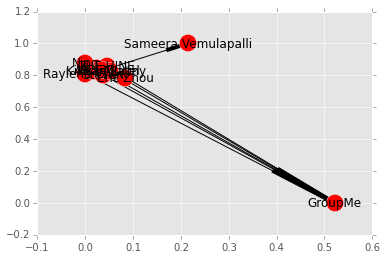

In [6]:
nx.draw_networkx(new_graph, pos=nx.spring_layout(new_graph))

In [7]:
nx.write_graphml(new_graph,'likes.graphml')